In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

**LOADING THE DATA**

In [3]:
data = pd.read_csv("bank-full.csv", delimiter=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**SAVING A COPY OF THE DATA**

In [4]:
data_copy = data.copy()

In [5]:
data.drop(['day', 'month', 'pdays'], axis=1, inplace=True)

**DATA VISUALIZATION OR EDA**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

target class distribution

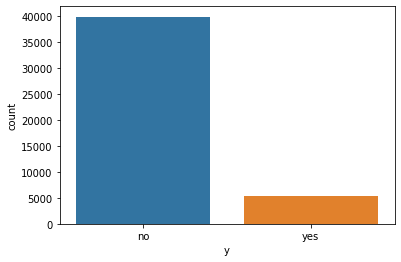

In [7]:
sns.countplot(data['y'])

There is imbalance in the target, I will fix this in the processing step

Distribution of categorical columns

**JOB**

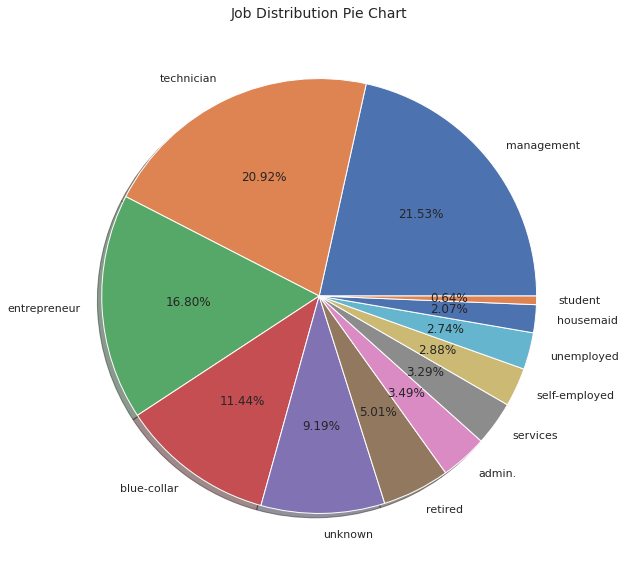

In [8]:
plt.figure(figsize=(10,10))
sns.set(style='whitegrid')
labels = ['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student']
values = data['job'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
plt.title("Job Distribution Pie Chart", fontdict={'fontsize': 14})
plt.show()

**MARITAL**

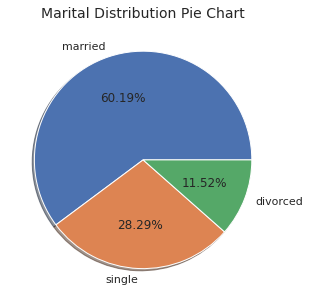

In [9]:
plt.figure(figsize=(5,5))
sns.set(style='whitegrid')
labels = ['married', 'single', 'divorced']
values = data['marital'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
plt.title("Marital Distribution Pie Chart", fontdict={'fontsize': 14})
plt.show()

**Education**

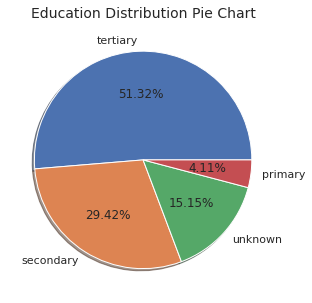

In [10]:
plt.figure(figsize=(5,5))
sns.set(style='whitegrid')
labels = ['tertiary', 'secondary', 'unknown', 'primary']
values = data['education'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
plt.title("Education Distribution Pie Chart", fontdict={'fontsize': 14})
plt.show()

**Default**

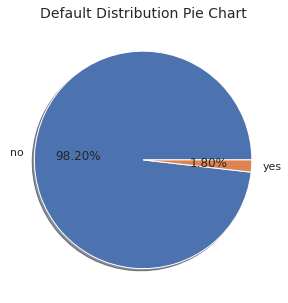

In [11]:
plt.figure(figsize=(5,5))
sns.set(style='whitegrid')
labels = ['no', 'yes']
values = data['default'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
plt.title("Default Distribution Pie Chart", fontdict={'fontsize': 14})
plt.show()

**Housing**

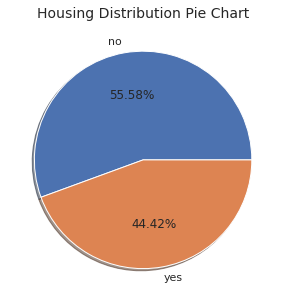

In [12]:
plt.figure(figsize=(5,5))
sns.set(style='whitegrid')
labels = ['no', 'yes']
values = data['housing'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
plt.title("Housing Distribution Pie Chart", fontdict={'fontsize': 14})
plt.show()

**Loan**

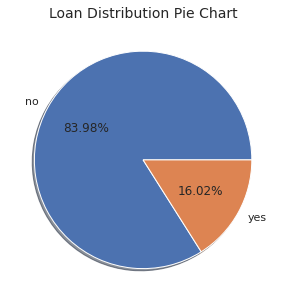

In [13]:
plt.figure(figsize=(5,5))
sns.set(style='whitegrid')
labels = ['no', 'yes']
values = data['loan'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
plt.title("Loan Distribution Pie Chart", fontdict={'fontsize': 14})
plt.show()

**Contact**

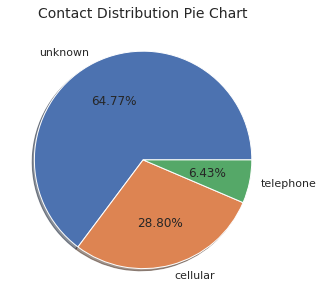

In [14]:
plt.figure(figsize=(5,5))
sns.set(style='whitegrid')
labels = ['unknown', 'cellular', 'telephone']
values = data['contact'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
plt.title("Contact Distribution Pie Chart", fontdict={'fontsize': 14})
plt.show()

**Poutcome**

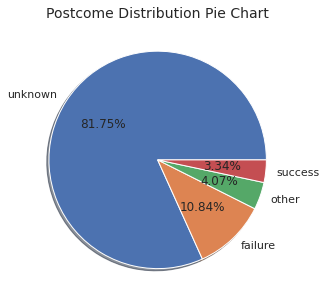

In [15]:
plt.figure(figsize=(5,5))
sns.set(style='whitegrid')
labels = ['unknown', 'failure', 'other', 'success']
values = data['poutcome'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
plt.title("Postcome Distribution Pie Chart", fontdict={'fontsize': 14})
plt.show()

**Target**

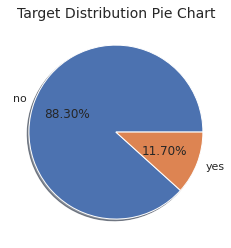

In [16]:
plt.figure(figsize=(4,4))
sns.set(style='whitegrid')
labels = ['no', 'yes']
values = data['y'].value_counts().tolist()

plt.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
plt.title("Target Distribution Pie Chart", fontdict={'fontsize': 14})
plt.show()

**Ages Distribution**

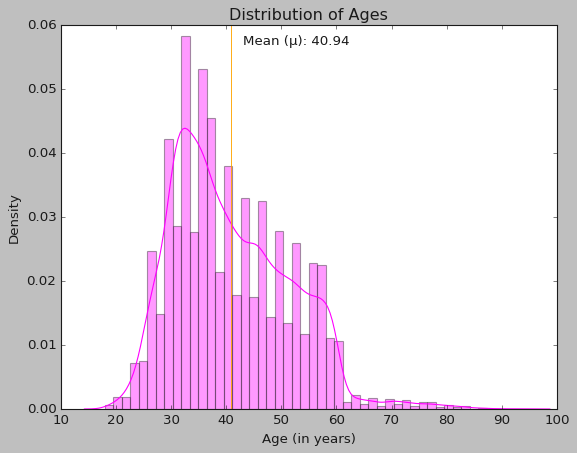

In [17]:
plt.style.use("classic")
sns.distplot(data['age'], color='magenta', kde=True)
plt.axvline(data['age'].mean(), color='orange', linestyle='-', linewidth=0.8)
min_ylim, max_ylim = plt.ylim()
plt.text(data['age'].mean()*1.05, max_ylim*0.95, 'Mean (μ): {:.2f}'.format(data['age'].mean()))
plt.xlabel("Age (in years)")
plt.title(f"Distribution of Ages")
plt.show()

**DATA PROCESSING**

first lets check for null values

In [18]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
previous     0
poutcome     0
y            0
dtype: int64

Encoding categorical data to numeric data

In [19]:
job_mapping = {'management':0, 'technician':1, 'entrepreneur':2, 'blue-collar':3,
       'unknown':4, 'retired':5, 'admin.':6, 'services':7, 'self-employed':8,
       'unemployed':9, 'housemaid':10, 'student':11}

marital_mapping = {'married':0, 'single':1, 'divorced':2}

education_mapping = {'tertiary':0, 'secondary':1, 'unknown':2, 'primary':3}

yes_no_mapping = {'no':0, 'yes':1}

contact_mapping = {'unknown':0, 'cellular':1, 'telephone':2}

poutcome_mapping = {'unknown':0, 'failure':1, 'other':2, 'success':3}

In [20]:
data['job'] = data['job'].map(job_mapping)
data['marital'] = data['marital'].map(marital_mapping)
data['education'] = data['education'].map(education_mapping)
data['default'] = data['default'].map(yes_no_mapping)
data['housing'] = data['housing'].map(yes_no_mapping)
data['loan'] = data['loan'].map(yes_no_mapping)
data['contact'] = data['contact'].map(contact_mapping)
data['poutcome'] = data['poutcome'].map(poutcome_mapping)
data['y'] = data['y'].map(yes_no_mapping)

Feature Selection

first lets drop all the non-negative rows

In [21]:
negatives = data[data['balance']<0].index
data.drop(negatives, inplace=True)

In [23]:
X, y = data.drop('y', axis=1), data['y']

In [24]:
from sklearn.feature_selection import SelectKBest, chi2

In [27]:
selector = SelectKBest(chi2, k=9)
selector.fit_transform(X, y)

array([[   0, 2143,    1, ...,    1,    0,    0],
       [   1,   29,    1, ...,    1,    0,    0],
       [   1,    2,    1, ...,    1,    0,    0],
       ...,
       [   1, 5715,    0, ...,    5,    3,    3],
       [   1,  668,    0, ...,    4,    0,    0],
       [   1, 2971,    0, ...,    2,   11,    2]])

In [28]:
X.columns[selector.get_support()]

Index(['education', 'balance', 'housing', 'loan', 'contact', 'duration',
       'campaign', 'previous', 'poutcome'],
      dtype='object')

In [29]:
X_new = data[['education', 'balance', 'housing', 'loan', 'contact', 'duration',
       'campaign', 'previous', 'poutcome']]

y_new = data['y']

checking for class imbalance

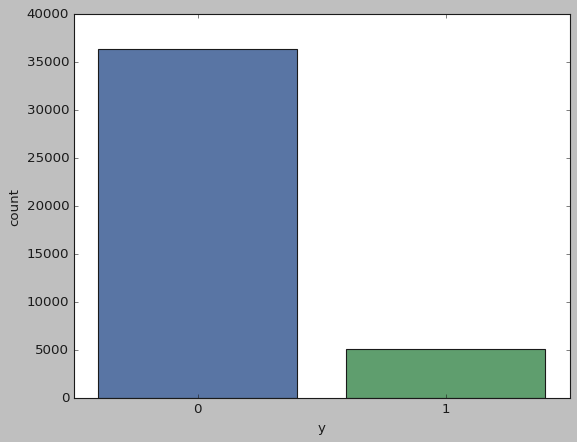

In [30]:
sns.countplot(y_new)

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
smote = SMOTE(random_state=56)

X, y = smote.fit_resample(X_new, y_new)

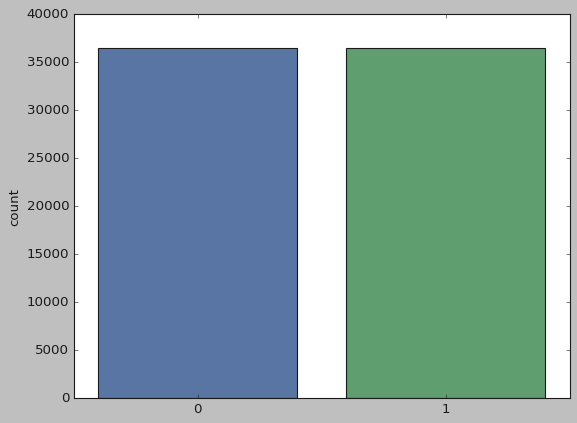

In [33]:
sns.countplot(y)

**SPLITTING DATA INTO TRAINING, TESTING AND VALIDATION SETS**

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

x_train_, x_val, y_train_, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=56)

**MODEL SELECTION**

In [36]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

In [37]:
from sklearn.metrics import f1_score, classification_report

In [38]:
def model_selection(x_train_, x_val, y_train_, y_val, model):
  model = model()
  model.fit(x_train_, y_train_)

  pred = model.predict(x_val)

  f1 = f1_score(y_val, pred)
  report = classification_report(y_val, pred)
  train_score = model.score(x_train_, y_train_)
  val_score = model.score(x_val, y_val)

  print('F1 Score:', f1*100)
  print('\n')
  print('Classification report:', report)
  print('\n')
  print('Train Score:', train_score*100)
  print('\n')
  print('Val Score:', val_score*100)
  print('\n')
  print('Is overfitting:', True if train_score>val_score else False)
  print('\n')
  print('Overfitting by:',train_score*100-val_score*100)

In [39]:
extratrees = model_selection(x_train_, x_val, y_train_, y_val, ExtraTreesClassifier)
extratrees

F1 Score: 88.87397214297702


Classification report:               precision    recall  f1-score   support

           0       0.90      0.87      0.88      5792
           1       0.87      0.91      0.89      5845

    accuracy                           0.89     11637
   macro avg       0.89      0.89      0.89     11637
weighted avg       0.89      0.89      0.89     11637



Train Score: 99.95488527971126


Val Score: 88.60531064707399


Is overfitting: True


Overfitting by: 11.349574632637271


In [40]:
gradient = model_selection(x_train_, x_val, y_train_, y_val, GradientBoostingClassifier)
gradient

F1 Score: 86.95072125406486


Classification report:               precision    recall  f1-score   support

           0       0.89      0.84      0.86      5792
           1       0.85      0.89      0.87      5845

    accuracy                           0.87     11637
   macro avg       0.87      0.87      0.87     11637
weighted avg       0.87      0.87      0.87     11637



Train Score: 86.82650167568961


Val Score: 86.55151671392971


Is overfitting: True


Overfitting by: 0.2749849617598983


In [41]:
randomforest = model_selection(x_train_, x_val, y_train_, y_val, RandomForestClassifier)
randomforest

F1 Score: 89.53110685433498


Classification report:               precision    recall  f1-score   support

           0       0.91      0.86      0.89      5792
           1       0.87      0.92      0.90      5845

    accuracy                           0.89     11637
   macro avg       0.89      0.89      0.89     11637
weighted avg       0.89      0.89      0.89     11637



Train Score: 99.95273695969752


Val Score: 89.19824697086878


Is overfitting: True


Overfitting by: 10.754489988828738


In [43]:
ada = model_selection(x_train_, x_val, y_train_, y_val, AdaBoostClassifier)
ada

F1 Score: 85.93986225432555


Classification report:               precision    recall  f1-score   support

           0       0.87      0.84      0.85      5792
           1       0.84      0.88      0.86      5845

    accuracy                           0.86     11637
   macro avg       0.86      0.86      0.86     11637
weighted avg       0.86      0.86      0.86     11637



Train Score: 85.46876342700008


Val Score: 85.61484918793504


Is overfitting: False


Overfitting by: -0.14608576093495174


In [44]:
decisiontree = model_selection(x_train_, x_val, y_train_, y_val, DecisionTreeClassifier)
decisiontree

F1 Score: 86.43326039387308


Classification report:               precision    recall  f1-score   support

           0       0.87      0.84      0.86      5792
           1       0.85      0.88      0.86      5845

    accuracy                           0.86     11637
   macro avg       0.86      0.86      0.86     11637
weighted avg       0.86      0.86      0.86     11637



Train Score: 99.95488527971126


Val Score: 86.14763255134484


Is overfitting: True


Overfitting by: 13.807252728366421


In [45]:
xgb = model_selection(x_train_, x_val, y_train_, y_val, XGBClassifier)
xgb

F1 Score: 86.77274987568374


Classification report:               precision    recall  f1-score   support

           0       0.89      0.83      0.86      5792
           1       0.84      0.90      0.87      5845

    accuracy                           0.86     11637
   macro avg       0.86      0.86      0.86     11637
weighted avg       0.86      0.86      0.86     11637



Train Score: 86.67182263469967


Val Score: 86.2851250322248


Is overfitting: True


Overfitting by: 0.38669760247486806


In [46]:
lgbm = model_selection(x_train_, x_val, y_train_, y_val, LGBMClassifier)
lgbm

F1 Score: 87.70204965839027


Classification report:               precision    recall  f1-score   support

           0       0.89      0.85      0.87      5792
           1       0.85      0.90      0.88      5845

    accuracy                           0.87     11637
   macro avg       0.87      0.87      0.87     11637
weighted avg       0.87      0.87      0.87     11637



Train Score: 88.09830712382917


Val Score: 87.31631863882444


Is overfitting: True


Overfitting by: 0.7819884850047316


In [47]:
logistic = model_selection(x_train_, x_val, y_train_, y_val, LogisticRegression)
logistic

F1 Score: 82.42935470265711


Classification report:               precision    recall  f1-score   support

           0       0.83      0.81      0.82      5792
           1       0.81      0.84      0.82      5845

    accuracy                           0.82     11637
   macro avg       0.82      0.82      0.82     11637
weighted avg       0.82      0.82      0.82     11637



Train Score: 82.39666580733866


Val Score: 82.10019764544127


Is overfitting: True


Overfitting by: 0.2964681618973941


I will choose LGBMClassifier cuz it has a good f1 score and the over fitting rate is low

**MODEL BUILDING AND TRAINING**

In [48]:
model = LGBMClassifier()
model.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**PREDICTIONS**

In [49]:
pred = model.predict(x_test)
pred

array([1, 1, 1, ..., 0, 0, 1])

**PRECISION, RECALL, ACCURACY AND AUC CHECK**

In [50]:
from sklearn.metrics import roc_auc_score

In [51]:
f1 = f1_score(y_test, pred)
f1*100

88.215756609539

In [52]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.90      0.85      0.87      7203\n           1       0.86      0.90      0.88      7344\n\n    accuracy                           0.88     14547\n   macro avg       0.88      0.88      0.88     14547\nweighted avg       0.88      0.88      0.88     14547\n'

In [53]:
AUC = roc_auc_score(y_test, pred)
AUC*100

87.77951089732944

**CHECKING FOR OVERFITTING**

In [54]:
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

print('Overfitting by:', train_score*100-test_score*100)

Overfitting by: 0.178111457199293


The model is overfitting by less than 1%